In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [16]:

from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
X = iris['data']
y = iris['target']

In [8]:
sns.set()

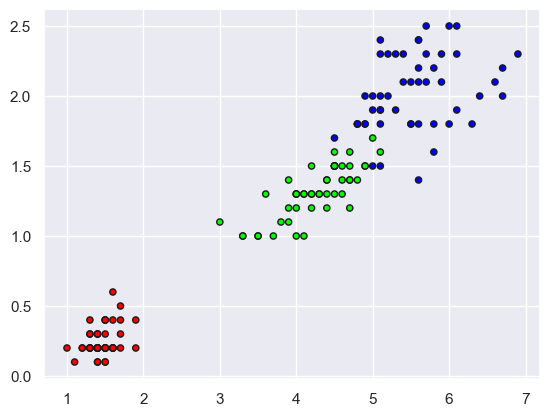

In [9]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
model = KNN(k=5)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [19]:
accuracy = np.sum(prediction==y_test)/len(y_test)

In [22]:
accuracy

1.0